In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [104]:
img = plt.imread('img_seg/apple.jpg')
img.shape

(501, 752, 3)

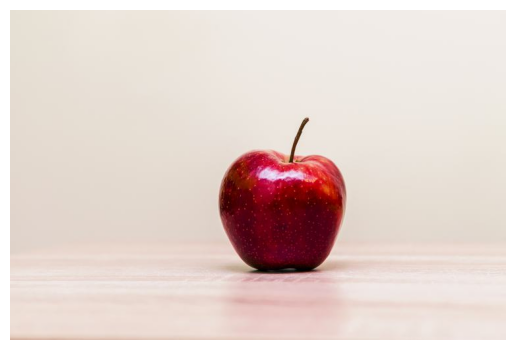

In [105]:
plt.imshow(img)
plt.axis('off')
plt.show()


In [146]:
def segment_image(img, n_clusters=2):
    pixels = img.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pixels)
    
    centers = np.array(kmeans.cluster_centers_, dtype='uint')
    labels = kmeans.labels_

    new_img = np.zeros(pixels.shape, dtype='uint')
    label_array = np.zeros(pixels.shape, dtype='uint')

    for i in range(new_img.shape[0]):
        new_img[i] = centers[labels[i]]
        label_array[i] = labels[i]

    
    new_img = new_img.reshape(img.shape)
    labels = label_array.reshape(img.shape)
    labels = labels[:,:,0]

    return new_img, labels, centers

In [150]:
new_img, labels, centers = segment_image(img, n_clusters=2)

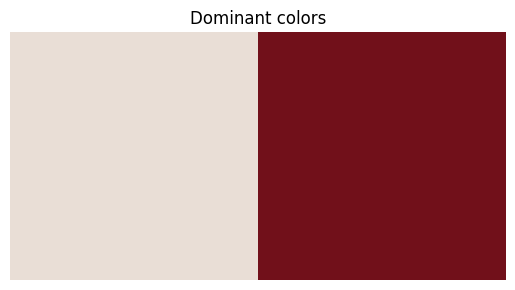

In [151]:
# plot the color patches

plt.imshow([centers])
plt.axis('off')
plt.title('Dominant colors')
plt.show()

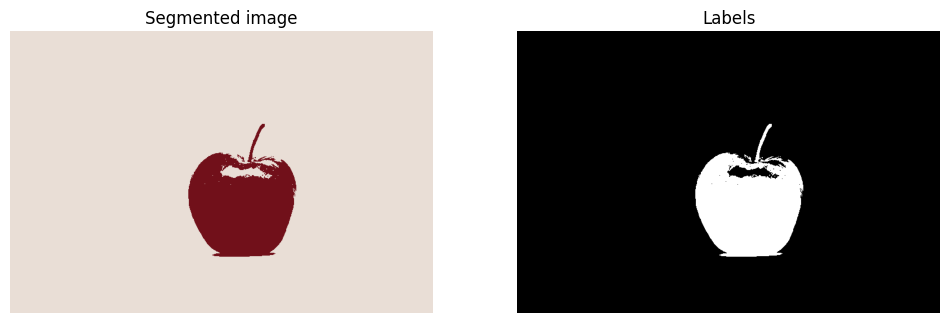

In [152]:
# subplots showing segmented image and label heatmap, both images same shape
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(new_img)
ax[0].axis('off')
ax[0].set_title('Segmented image')

ax[1].imshow(labels, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Labels')
plt.show()

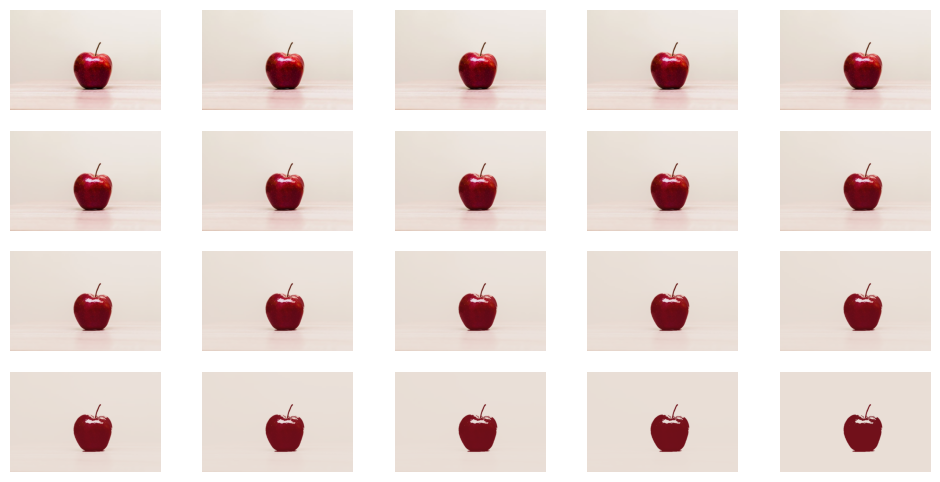

In [142]:
# plot original image "underneath" the segmented image
alphas = np.linspace(0, 1, 20)

fig, axs = plt.subplots(4, 5, figsize=(12, 6))
for i, alpha in enumerate(alphas):
    axs[i//5, i%5].imshow(img)
    axs[i//5, i%5].imshow(new_img, alpha=alpha)
    axs[i//5, i%5].axis('off')
plt.show()